<a href="https://colab.research.google.com/github/bramantio5/Machine_Learning_Portfolio/blob/main/Iris_Flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### IMPORT PACKAGES ###

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Iris_Flower_Data.csv')

### DATA OVERVIEW ###

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### CHECK MISSING VALUE ###

In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

There are no missing value in the dataset

### EDA ###

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

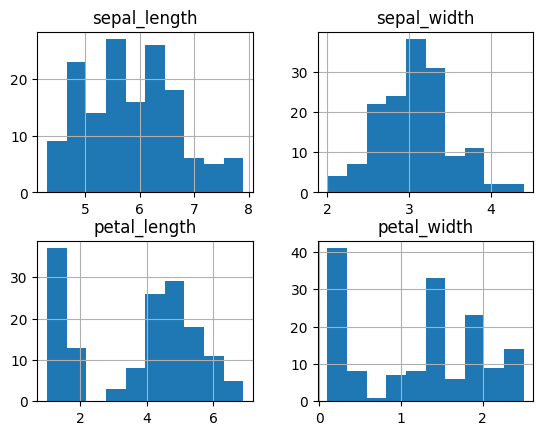

In [ ]:
df.hist()

### Model Preparation ###

In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
# import libraries
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
encoded = df['species']

In [ ]:
#Encoding "Species"

enc_species = pd.DataFrame(le.fit_transform(encoded))
enc_species.columns = ['enc_species']
enc_species.head()

,enc_species
0,0
1,0
2,0
3,0
4,0


In [ ]:
enc_species['enc_species'].unique()

array([0, 1, 2])

In [ ]:
df2 = df.drop('species', axis = 1)
df3 = df2.join(enc_species)
df3

,sepal_length,sepal_width,petal_length,petal_width,enc_species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


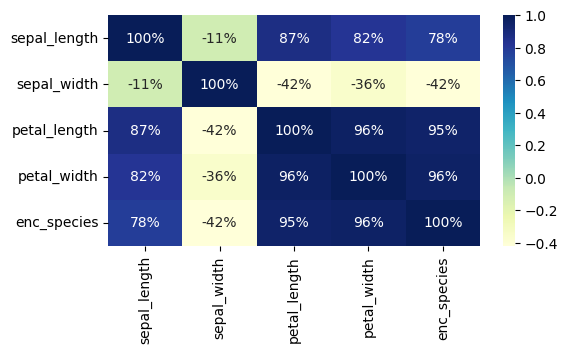

In [ ]:
plt.figure(figsize=(6,3))
sns.heatmap(df3.corr(),annot=True,fmt=".0%", cmap="YlGnBu")
plt.show()

In [ ]:
# import libraries
from sklearn.model_selection import train_test_split

train, test = train_test_split(df3, test_size=0.3)

In [ ]:
train.shape, test.shape

((105, 5), (45, 5))

In [ ]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,enc_species
33,5.5,4.2,1.4,0.2,0
76,6.8,2.8,4.8,1.4,1
102,7.1,3.0,5.9,2.1,2
61,5.9,3.0,4.2,1.5,1
0,5.1,3.5,1.4,0.2,0


### MODELLING & EVALUATING###
1. Linear Regression
2. Logistic Regression
3. Decision Tree
4. Random Forest
5. Support Vector Machine (SVM)

1. Linear Regression

In [ ]:
#import libraries
from sklearn.linear_model import LinearRegression
# predictor = X, Target = y

X_train = train.drop(['enc_species'], 1)
y_train = train['enc_species']
X_test = test.drop(['enc_species'], 1)
y_test = test['enc_species']

lr = LinearRegression()
lr.fit(X_train, y_train)

<ipython-input-21-fd0f04d88834>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train = train.drop(['enc_species'], 1)
<ipython-input-21-fd0f04d88834>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = test.drop(['enc_species'], 1)


LinearRegression()

In [ ]:
lr.predict(X_test[2:3])

array([0.95339082])

In [ ]:
lr.score(X_test, y_test)

0.9596613075228171

2. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression object
log_reg = LogisticRegression()

# Fit the model on the training data
log_reg.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
log_reg.predict(X_test)

array([0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1, 2, 1, 0, 0, 0, 1,
       0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 0, 1, 2, 2, 2, 2, 2, 0, 2, 0, 1, 0,
       1])

In [ ]:
log_reg.score(X_test, y_test)

0.9777777777777777

3. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree object
dtc = DecisionTreeClassifier()

# Fit the model on the training data
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Predict the test data using the trained model
dtc.predict(X_test)

array([0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1, 2, 1, 0, 0, 0, 1,
       0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 0, 1, 2, 2, 2, 2, 2, 0, 2, 0, 1, 0,
       1])

In [ ]:
dtc.score(X_test, y_test)

0.9777777777777777

4. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest classifier object
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the testing data
y_pred = clf.predict(X_test)


In [ ]:

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9777777777777777


5. Support Vector Machine (SVM)

In [ ]:
# Import the required libraries
from sklearn.svm import SVC

In [ ]:
# Create an SVM classifier object
clf_SVC = SVC(kernel='linear')

# Train the classifier on the training data
clf_SVC.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# Make predictions on the testing data
y_pred = clf_SVC.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9777777777777777
